# EDA

In [2]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\flagship'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

#### Import data

In [4]:
toy_dataset_df = pd.read_csv('toy_dataset_1_10_23.csv')
toy_products_df = pd.read_csv('toy_products_1_10_23.csv')

In [5]:
toy_products_df.shape

(3125, 6)

In [6]:
toy_dataset_df.shape

(32151, 23)

### Toy Products

In [7]:
toy_products_df.head()

,product_id,product_title,product_category,sale_amount,product_color,product_gender
0,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Men
1,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Women
2,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Kids
3,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Youth
4,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Unisex


In [8]:
# Display basic dataframe info
print(toy_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        3125 non-null   int64 
 1   product_title     3125 non-null   object
 2   product_category  3125 non-null   object
 3   sale_amount       3125 non-null   int64 
 4   product_color     3125 non-null   object
 5   product_gender    3125 non-null   object
dtypes: int64(2), object(4)
memory usage: 146.6+ KB
None


In [9]:
# Display basic statistics for numerical columns
toy_products_df.describe()

,product_id,sale_amount
count,3125.000000,3125.000000
mean,4608.458240,237.600640
std,2910.735893,101.247278
min,538.000000,81.000000
25%,1921.000000,179.000000
50%,4839.000000,214.000000
75%,6134.000000,308.000000
max,9872.000000,478.000000


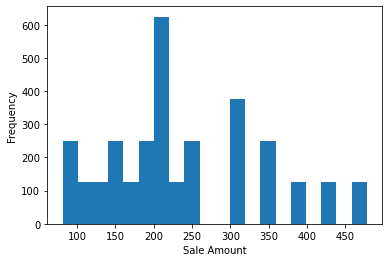

In [10]:
# Visualize the distribution of sale amounts using a histogram
plt.hist(toy_products_df['sale_amount'], bins=20)
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

In [11]:
toy_products_df['product_title'].nunique()

25

In [12]:
toy_products_df['product_title'].value_counts()

Marathon Running       126
Naive Boot             125
Corner Sandal          125
Envy Sandal            125
Stacked Hiking Boot    125
Forest Sandal          125
Evermore Boot          125
Discrete Sandal        125
Roundup Boot           125
Training Sneaker       125
Descent Running        125
Boost Boot             125
Classic Sneaker        125
Gator Sandal           125
Vanguard Sandal        125
Alley Boot             125
Original Boot          125
Gradient Sneaker       125
Hustler Boot           125
Bejeweled Boot         125
Scalar Sandal          125
Olympic Running        125
Rogue Sneaker          125
Iron Running           125
League Running         124
Name: product_title, dtype: int64

In [13]:
toy_products_df['product_id'].nunique()

24

In [14]:
# look at product titles that share ID
title_count = toy_products_df.groupby('product_id')['product_title'].nunique()
title_count[title_count > 1].index.tolist()

[1983]

In [15]:
toy_products_df[toy_products_df['product_id']==1983]

,product_id,product_title,product_category,sale_amount,product_color,product_gender
750,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Men
751,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Women
752,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Kids
753,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Youth
754,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Unisex
...,...,...,...,...,...,...
2245,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Men
2246,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Women
2247,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Kids
2248,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Youth


In [16]:
# check for products that span categories
category_count = toy_products_df.groupby('product_id')['product_category'].nunique()
category_count[category_count > 1].index.tolist()

[]

#### Product Category

In [17]:
# Count unique values of categoricals
toy_products_df['product_category'].value_counts()

Boot       1125
Sandal      875
Running     625
Sneaker     500
Name: product_category, dtype: int64

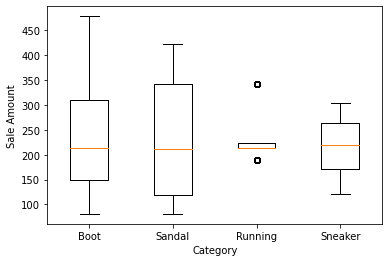

In [18]:
plt.boxplot([toy_products_df[toy_products_df['product_category'] == 'Boot']['sale_amount'], 
             toy_products_df[toy_products_df['product_category'] == 'Sandal']['sale_amount'],
             toy_products_df[toy_products_df['product_category'] == 'Running']['sale_amount'],
             toy_products_df[toy_products_df['product_category'] == 'Sneaker']['sale_amount']
            ])
plt.xticks([1, 2,3,4], ['Boot', 'Sandal', 'Running', 'Sneaker'])
plt.xlabel('Category')
plt.ylabel('Sale Amount')
plt.show()

In [19]:
# Count unique values of categoricals
toy_products_df['product_gender'].value_counts()

Women     625
Youth     625
Kids      625
Unisex    625
Men       625
Name: product_gender, dtype: int64

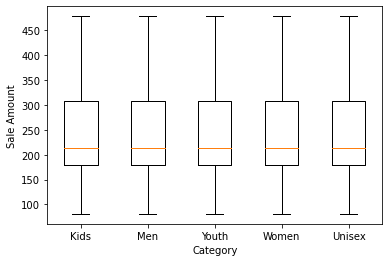

In [20]:
plt.boxplot([toy_products_df[toy_products_df['product_gender'] == 'Kids']['sale_amount'], 
             toy_products_df[toy_products_df['product_gender'] == 'Men']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Youth']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Women']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Unisex']['sale_amount']
            ])
plt.xticks([1, 2,3,4,5], ['Kids', 'Men', 'Youth', 'Women', 'Unisex'])
plt.xlabel('Category')
plt.ylabel('Sale Amount')
plt.show()

In [21]:
# Count unique values of categoricals
toy_products_df['product_color'].value_counts()

Selective Yellow                125
Mordant Red 19                  125
Alice Blue                      125
Dark Powder Blue                125
Dark Red                        125
Topaz                           125
Burnt Sienna                    125
Yellow-Green                    125
Fern Green                      125
Green (Munsell)                 125
Vermilion (Plochere)            125
Canary Yellow                   125
Pastel Magenta                  125
Han Purple                      125
Electric Purple                 125
Electric Green                  125
Lavender Purple                 125
Sky Blue                        125
Mikado Yellow                   125
Prussian Blue                   125
Royal Blue (Web)                125
Dartmouth Green                 125
Midnight Green (Eagle Green)    125
Ruby Red                        125
Stormcloud                      125
Name: product_color, dtype: int64

In [22]:
len(toy_products_df['product_color'].value_counts())

25

In [23]:
# quick math check
25*125

3125

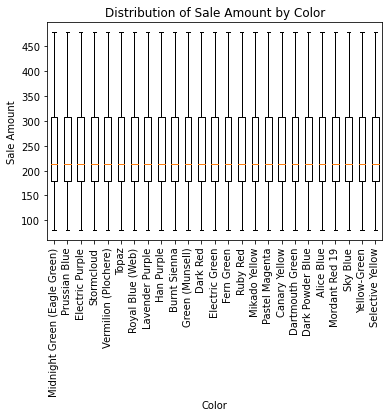

In [24]:
category_sale_amount = []
categories = toy_products_df['product_color'].unique()
for category in categories:
    category_sale_amount.append(toy_products_df[toy_products_df['product_color'] == category]['sale_amount'])
plt.boxplot(category_sale_amount, labels=categories)
plt.xticks(rotation=90)
plt.ylabel('Sale Amount')
plt.xlabel('Color')
plt.title('Distribution of Sale Amount by Color')
plt.show()

## Toy Dataset

In [25]:
toy_dataset_df.shape

(32151, 23)

In [26]:
toy_dataset_df.head()

,Unnamed: 0,timestamp,transaction_id,hash_customer,sale_amount,product_title,product_color,product_gender,product_category,product_size,referrer_source,point_of_sales,zip_tot_hh,zip_avg_hh_size,zip_avg_fam_size,zip_med_age,zip_male_female_ratio,zip_tot_pop,zip_tot_white_nh,zip_med_hh_income,zip_mean_hh_income,zip_pct_emp_lf,zip_unemp_rate
0,10,2019-10-17 17:00:00,13964574791861793493,118171218419602151,141.0,Rogue Sneaker,Midnight Green (Eagle Green),Women,Sneaker,11.0,Direct,Online Store,14957.0,1.81,2.55,56.9,109.0,27226.0,21301.0,73818.0,122494.0,54.7,5.6
1,11,2022-03-26 04:00:00,15462755904385104185,118171218419602151,262.0,Vanguard Sandal,Prussian Blue,Women,Sandal,11.0,Direct,Online Store,14957.0,1.81,2.55,56.9,109.0,27226.0,21301.0,73818.0,122494.0,54.7,5.6
2,12,2019-10-18 06:00:00,5418521222138237582,15372924648196696535,141.0,Rogue Sneaker,Electric Purple,Women,Sneaker,6.0,Direct,Online Store,11695.0,2.52,3.20,44.4,94.0,30274.0,23867.0,92031.0,135491.0,62.9,4.9
3,13,2021-10-03 19:00:00,13807911046559617059,15372924648196696535,147.0,Classic Sneaker,Electric Purple,Women,Sneaker,5.5,Direct,Online Store,11695.0,2.52,3.20,44.4,94.0,30274.0,23867.0,92031.0,135491.0,62.9,4.9
4,14,2019-10-18 09:00:00,17285359619674932653,10040016928726048703,194.0,Olympic Running,Stormcloud,Women,Running,11.5,Search,Online Store,8517.0,2.56,3.17,46.7,90.6,21848.0,18220.0,199598.0,345660.0,57.4,3.1


In [77]:
# subset to only Online transactions
toy_dataset_df = toy_dataset_df[toy_dataset_df['point_of_sales']=='Online Store']

In [27]:
print(toy_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32151 entries, 0 to 32150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             32151 non-null  int64  
 1   timestamp              32151 non-null  object 
 2   transaction_id         32151 non-null  uint64 
 3   hash_customer          32151 non-null  uint64 
 4   sale_amount            32151 non-null  float64
 5   product_title          32151 non-null  object 
 6   product_color          32151 non-null  object 
 7   product_gender         32151 non-null  object 
 8   product_category       32151 non-null  object 
 9   product_size           32077 non-null  float64
 10  referrer_source        32151 non-null  object 
 11  point_of_sales         32151 non-null  object 
 12  zip_tot_hh             32151 non-null  float64
 13  zip_avg_hh_size        32124 non-null  float64
 14  zip_avg_fam_size       32124 non-null  float64
 15  zi

#### Timestamp

In [28]:
toy_dataset_df['timestamp'] = pd.to_datetime(toy_dataset_df['timestamp'])

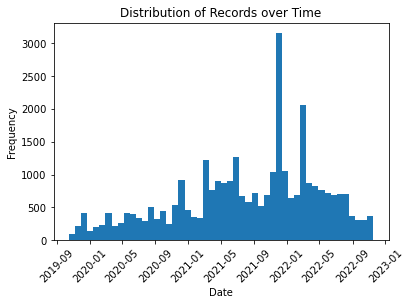

In [29]:
plt.hist(toy_dataset_df['timestamp'], bins=50)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Records over Time')
plt.xticks(rotation=45)
plt.show()

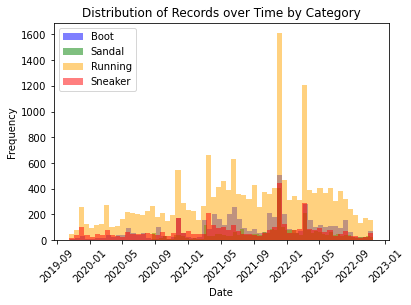

In [30]:
categories = ['Boot', 'Sandal', 'Running', 'Sneaker']
colors = ['blue', 'green', 'orange', 'red']

# Create histogram of records by datetime, with different colors for different categories
for i, category in enumerate(categories):
    plt.hist(toy_dataset_df[toy_dataset_df['product_category'] == category]['timestamp'],
             bins=60,
             alpha=0.5,
             label=category,
             color=colors[i])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Records over Time by Category')
plt.show()

#### Transaction ID

In [31]:
toy_dataset_df['transaction_id'].nunique()

23459

In [32]:
# number of items per transaction
items_per_transaction = toy_dataset_df.groupby('transaction_id').size().reset_index(name='item_count')

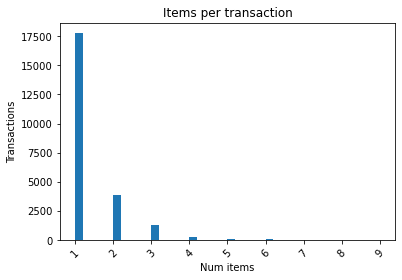

In [33]:
plt.hist(items_per_transaction[items_per_transaction['item_count']<10]['item_count'], bins=40)
plt.xlabel('Num items')
plt.ylabel('Transactions')
plt.title('Items per transaction')
plt.xticks(rotation=45)
plt.show()

In [34]:
item_counts = toy_dataset_df.groupby('transaction_id').size().value_counts()
total_transactions = item_counts.sum()
item_percentages = (item_counts / total_transactions) * 100
item_percentages = item_percentages.sort_index()
item_percentages[0:5]

1    75.715077
2    16.475553
3     5.579948
4     1.248988
5     0.387911
dtype: float64

#### Customer hash

In [35]:
toy_dataset_df['hash_customer'].nunique()

7622

In [36]:
# Add column for transaction number for each user
df_sorted = toy_dataset_df.sort_values('timestamp').groupby(['hash_customer', 'timestamp']).first().reset_index()
df_sorted['transaction_num'] = df_sorted.groupby('hash_customer', sort=False)['timestamp'].rank(method='dense')
# Merge the transaction number back into the original dataframe
toy_dataset_df = toy_dataset_df.merge(df_sorted[['hash_customer', 'timestamp', 'transaction_num']], 
                                      on=['hash_customer', 'timestamp'])

In [73]:
transaction_num_counts = toy_dataset_df.groupby('transaction_num').size() / toy_dataset_df.shape[0] * 100.0

In [74]:
transaction_num_counts[0:10]

transaction_num
1.0     33.541725
2.0     26.045846
3.0     13.116233
4.0      7.561196
5.0      4.662374
6.0      3.141426
7.0      2.214550
8.0      1.642251
9.0      1.160151
10.0     1.060620
dtype: float64

In [37]:
# Number of transactions per user
transactions_per_user = toy_dataset_df.groupby('hash_customer')['transaction_id'].nunique().reset_index()
transactions_per_user.columns = ['hash_customer', 'transaction_count']

In [75]:
user_transaction_counts = transactions_per_user.groupby('transaction_count').size() / toy_dataset_df['hash_customer'].nunique() * 100.0

In [76]:
user_transaction_counts[0:10]

transaction_count
1     13.447914
2     44.017318
3     19.299396
4      9.262661
5      4.749410
6      2.951981
7      1.771189
8      1.102073
9      0.852795
10     0.629756
dtype: float64

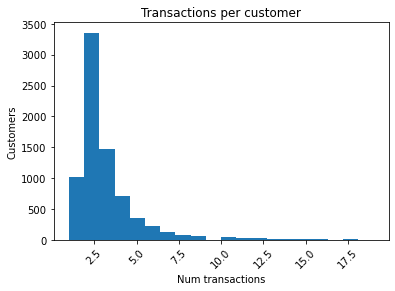

In [38]:
plt.hist(transactions_per_user[transactions_per_user['transaction_count']<20]['transaction_count'], 
         bins=20)
plt.xlabel('Num transactions')
plt.ylabel('Customers')
plt.title('Transactions per customer')
plt.xticks(rotation=45)
plt.show()

In [39]:
# outlier purchaser
toy_dataset_df[toy_dataset_df['hash_customer']==934772523603658765]['transaction_id'].nunique()

290

In [89]:
purchase_fields = ['hash_customer', 'product_title', 'product_category', 
                   'product_gender', 'product_color']

first_purchase_df = toy_dataset_df[toy_dataset_df['transaction_num']==1][purchase_fields]
second_purchase_df = toy_dataset_df[toy_dataset_df['transaction_num']==2][purchase_fields]

first_purchase_df.columns = ['hash_customer', 'first_product_title', 'first_product_category', 
                   'first_product_gender', 'first_product_color']

second_purchase_df.columns = ['hash_customer', 'second_product_title', 'second_product_category', 
                   'second_product_gender', 'second_product_color']

In [90]:
purchase_path_df = pd.merge(left=first_purchase_df, 
                            right=second_purchase_df, 
                            on='hash_customer', 
                            how='inner')

In [91]:
purchase_path_df.head()

,hash_customer,first_product_title,first_product_category,first_product_gender,first_product_color,second_product_title,second_product_category,second_product_gender,second_product_color
0,118171218419602151,Rogue Sneaker,Sneaker,Women,Midnight Green (Eagle Green),Vanguard Sandal,Sandal,Women,Prussian Blue
1,15372924648196696535,Rogue Sneaker,Sneaker,Women,Electric Purple,Classic Sneaker,Sneaker,Women,Electric Purple
2,10040016928726048703,Olympic Running,Running,Women,Stormcloud,Vanguard Sandal,Sandal,Men,Vermilion (Plochere)
3,10040016928726048703,Iron Running,Running,Men,Vermilion (Plochere),Vanguard Sandal,Sandal,Men,Vermilion (Plochere)
4,1043293858936909271,Iron Running,Running,Women,Topaz,Olympic Running,Running,Women,Electric Purple


In [102]:
transition_df = pd.DataFrame(purchase_path_df[['first_product_gender', 'second_product_gender']].value_counts().reset_index())

In [112]:
transition_df.columns = ['first_product_gender', 'second_product_gender', 'count']

In [120]:
transition_df.head(10)

,first_product_gender,second_product_gender,count
0,Women,Women,6126
1,Men,Men,2033
2,Women,Men,1055
3,Men,Women,947
4,Kids,Women,558
5,Kids,Kids,155
6,Women,Kids,151
7,Youth,Women,114
8,Women,Youth,99
9,Youth,Youth,95


In [122]:
transition_df[transition_df['first_product_gender']=='Women']

,first_product_gender,second_product_gender,count
0,Women,Women,6126
2,Women,Men,1055
6,Women,Kids,151
8,Women,Youth,99
15,Women,Unisex,40


In [125]:
transition_df[transition_df['first_product_gender']=='Kids']

,first_product_gender,second_product_gender,count
4,Kids,Women,558
5,Kids,Kids,155
10,Kids,Youth,78
11,Kids,Men,68
21,Kids,Unisex,4


In [126]:
transition_df[transition_df['first_product_gender']=='Men']

,first_product_gender,second_product_gender,count
1,Men,Men,2033
3,Men,Women,947
12,Men,Kids,59
14,Men,Youth,40
17,Men,Unisex,36


#### Sale Amount

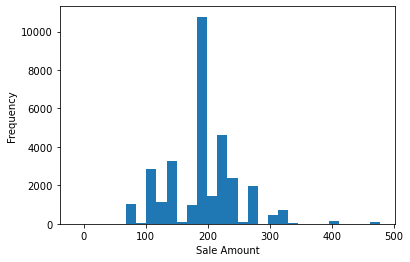

In [40]:
# Visualize the distribution of sale amounts using a histogram
plt.hist(toy_dataset_df['sale_amount'], bins=30)
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

In [41]:
# TODO - create transaction amount - total sale amount per transaction

#### Product Title

In [42]:
# Count unique values of categoricals
toy_dataset_df['product_title'].value_counts()

Olympic Running        10179
Iron Running            4654
League Running          3917
Hustler Boot            3504
Classic Sneaker         2220
Vanguard Sandal         2197
Rogue Sneaker           2142
Stacked Hiking Boot     1518
Scalar Sandal            658
Marathon Running         357
Original Boot            209
Corner Sandal            151
Evermore Boot            140
Gator Sandal             136
Bejeweled Boot            88
Training Sneaker          62
Alley Boot                 9
Discrete Sandal            6
Roundup Boot               4
Name: product_title, dtype: int64

In [80]:
toy_dataset_df['product_title'].value_counts() / toy_dataset_df.shape[0]

Olympic Running        0.316600
Iron Running           0.144754
League Running         0.121831
Hustler Boot           0.108986
Classic Sneaker        0.069049
Vanguard Sandal        0.068334
Rogue Sneaker          0.066623
Stacked Hiking Boot    0.047215
Scalar Sandal          0.020466
Marathon Running       0.011104
Original Boot          0.006501
Corner Sandal          0.004697
Evermore Boot          0.004354
Gator Sandal           0.004230
Bejeweled Boot         0.002737
Training Sneaker       0.001928
Alley Boot             0.000280
Discrete Sandal        0.000187
Roundup Boot           0.000124
Name: product_title, dtype: float64

In [43]:
toy_dataset_df['product_title'].unique()

array(['Rogue Sneaker', 'Vanguard Sandal', 'Classic Sneaker',
       'Olympic Running', 'Iron Running', 'Hustler Boot',
       'League Running', 'Original Boot', 'Evermore Boot',
       'Stacked Hiking Boot', 'Scalar Sandal', 'Gator Sandal',
       'Bejeweled Boot', 'Marathon Running', 'Roundup Boot',
       'Training Sneaker', 'Alley Boot', 'Corner Sandal',
       'Discrete Sandal'], dtype=object)

In [44]:
len(toy_dataset_df['product_title'].value_counts())

19

In [45]:
# Products in catalog, no transactions
toy_products_df[~toy_products_df['product_title'].isin(toy_dataset_df['product_title'].unique())]['product_title'].unique()

array(['Envy Sandal', 'Forest Sandal', 'Boost Boot', 'Gradient Sneaker',
       'Descent Running', 'Naive Boot'], dtype=object)

#### Product Color

In [46]:
# Count unique values of categoricals
toy_dataset_df['product_color'].value_counts()

Lavender Purple                 1335
Dark Red                        1327
Midnight Green (Eagle Green)    1321
Fern Green                      1318
Prussian Blue                   1317
Sky Blue                        1316
Green (Munsell)                 1310
Mordant Red 19                  1307
Burnt Sienna                    1300
Stormcloud                      1299
Ruby Red                        1295
Canary Yellow                   1291
Selective Yellow                1286
Han Purple                      1285
Vermilion (Plochere)            1283
Topaz                           1282
Mikado Yellow                   1280
Electric Green                  1274
Royal Blue (Web)                1272
Alice Blue                      1270
Electric Purple                 1256
Dartmouth Green                 1236
Pastel Magenta                  1234
Yellow-Green                    1230
Dark Powder Blue                1227
Name: product_color, dtype: int64

In [79]:
toy_dataset_df['product_color'].value_counts() / toy_dataset_df.shape[0]

Lavender Purple                 0.041523
Dark Red                        0.041274
Midnight Green (Eagle Green)    0.041087
Fern Green                      0.040994
Prussian Blue                   0.040963
Sky Blue                        0.040932
Green (Munsell)                 0.040745
Mordant Red 19                  0.040652
Burnt Sienna                    0.040434
Stormcloud                      0.040403
Ruby Red                        0.040279
Canary Yellow                   0.040154
Selective Yellow                0.039999
Han Purple                      0.039968
Vermilion (Plochere)            0.039905
Topaz                           0.039874
Mikado Yellow                   0.039812
Electric Green                  0.039626
Royal Blue (Web)                0.039563
Alice Blue                      0.039501
Electric Purple                 0.039066
Dartmouth Green                 0.038444
Pastel Magenta                  0.038381
Yellow-Green                    0.038257
Dark Powder Blue

In [81]:
pd.crosstab(toy_dataset_df['product_color'], toy_dataset_df['product_category'])

product_category,Boot,Running,Sandal,Sneaker
product_color,,,,
Alice Blue,205,794,112,159
Burnt Sienna,195,804,132,169
Canary Yellow,222,781,135,153
Dark Powder Blue,215,733,117,162
Dark Red,218,792,130,187
Dartmouth Green,237,749,97,153
Electric Green,214,748,138,174
Electric Purple,233,735,113,175
Fern Green,237,772,121,188


#### Product Gender

In [47]:
# Count unique values of categoricals
# toy_dataset_df['product_gender'].value_counts()
toy_dataset_df['product_gender'].value_counts() / toy_dataset_df.shape[0]

Women     0.666573
Men       0.252527
Kids      0.039968
Youth     0.029268
Unisex    0.011664
Name: product_gender, dtype: float64

#### Product Category

In [48]:
# Count unique values of categoricals
toy_dataset_df['product_category'].value_counts()

Running    19107
Boot        5472
Sneaker     4424
Sandal      3148
Name: product_category, dtype: int64

In [49]:
toy_dataset_df['product_category'].value_counts() / toy_dataset_df.shape[0]

Running    0.594289
Boot       0.170197
Sneaker    0.137601
Sandal     0.097913
Name: product_category, dtype: float64

#### Product Size

<AxesSubplot:>

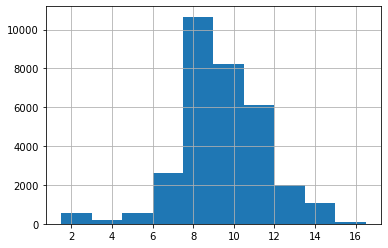

In [50]:
# Count unique values of categoricals
toy_dataset_df['product_size'].hist()

#### Referrer Source

In [51]:
# Count unique values of categoricals
toy_dataset_df['referrer_source'].value_counts()

Direct     20927
Search      9026
Social      1528
Unknown      652
Email         18
Name: referrer_source, dtype: int64

In [78]:
toy_dataset_df['referrer_source'].value_counts() / toy_dataset_df.shape[0]

Direct     0.650897
Search     0.280738
Social     0.047526
Unknown    0.020279
Email      0.000560
Name: referrer_source, dtype: float64

#### Point of Sales

In [52]:
# Count unique values of categoricals
toy_dataset_df['point_of_sales'].value_counts()

Online Store                     29338
Loop Returns                      1244
Point of Sale                      994
Flow Connect                       309
Returnly                           247
Shop                                10
Facebook                             6
Facebook Shop (discontinued)         2
Route - Protection & Tracking        1
Name: point_of_sales, dtype: int64

In [53]:
toy_dataset_df['point_of_sales'].value_counts() / toy_dataset_df.shape[0]

Online Store                     0.912507
Loop Returns                     0.038692
Point of Sale                    0.030917
Flow Connect                     0.009611
Returnly                         0.007682
Shop                             0.000311
Facebook                         0.000187
Facebook Shop (discontinued)     0.000062
Route - Protection & Tracking    0.000031
Name: point_of_sales, dtype: float64

In [54]:
# Zip columns

In [55]:
# Seasonality